
# PowerPulse: Household Energy Usage Forecast

This project aims to develop a machine learning model to predict household energy consumption based on historical data.


## 1. Data Downloading

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


import urllib.request
import zipfile
import os

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
filename = "household_power_consumption.zip"

if not os.path.exists("household_power_consumption.txt"):
    urllib.request.urlretrieve(url, filename)
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Downloaded and extracted dataset.")
else:
    print("Dataset already exists. Skipping download.")

Downloaded and extracted dataset.


## 2. Initial Data Exploration

In [11]:
df = pd.read_csv("household_power_consumption.txt", sep=';',
                 na_values=['?'], low_memory=False)
print(df.shape)
print(df.head())

(2075259, 9)
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


## 3. Data Cleaning and Preprocessing

In [13]:

# Drop rows with missing Global_active_power
df = df.dropna(subset=['Global_active_power'])

# Combine Date and Time into DateTime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Convert Global_active_power to numeric
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])

# Set DateTime as index
df = df.set_index('DateTime')

# Drop original Date and Time
df = df.drop(['Date', 'Time'], axis=1)

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## 4. Feature Engineering

In [15]:

df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day'] = df.index.day
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month,day
DateTime,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,5,12,16
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,5,12,16
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,5,12,16
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,5,12,16
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,5,12,16


## 5. Exploratory Data Analysis (EDA)

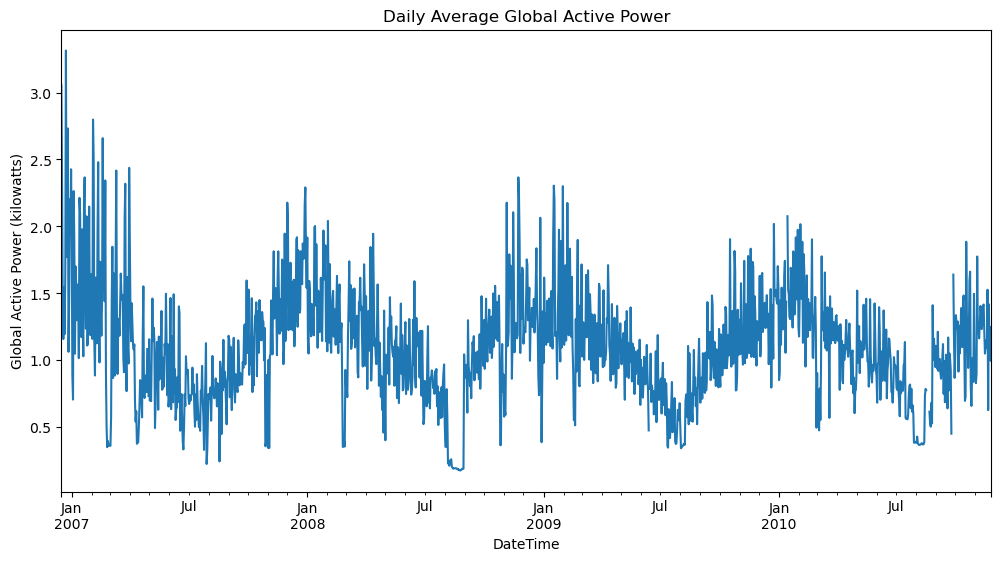

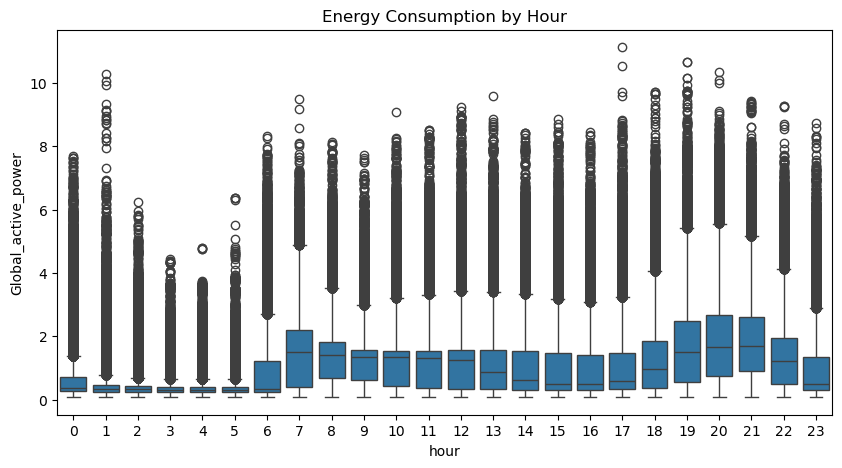

In [17]:

plt.figure(figsize=(12,6))
df['Global_active_power'].resample('D').mean().plot()
plt.title('Daily Average Global Active Power')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='hour', y='Global_active_power', data=df.reset_index())
plt.title('Energy Consumption by Hour')
plt.show()


## 6. Correlation Analysis

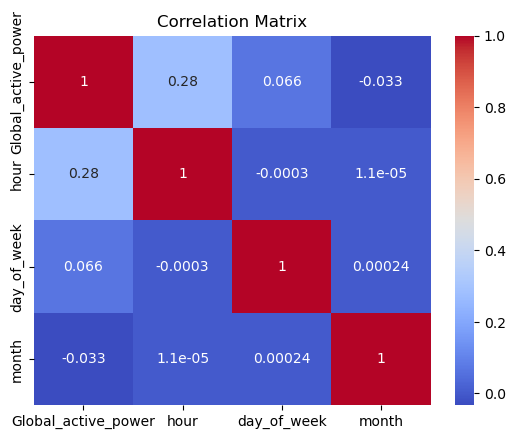

In [18]:

corr = df[['Global_active_power', 'hour', 'day_of_week', 'month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 7. Train-Test Split

In [21]:

from sklearn.model_selection import train_test_split

features = ['hour', 'day_of_week', 'month']
X = df[features]
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 8. Model Building

In [23]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## 9. Model Evaluation

In [25]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return rmse, mae, r2

lr_rmse, lr_mae, lr_r2 = evaluate(lr_model, X_test, y_test)
rf_rmse, rf_mae, rf_r2 = evaluate(rf_model, X_test, y_test)

print("Linear Regression: RMSE={:.3f}, MAE={:.3f}, R2={:.3f}".format(lr_rmse, lr_mae, lr_r2))
print("Random Forest: RMSE={:.3f}, MAE={:.3f}, R2={:.3f}".format(rf_rmse, rf_mae, rf_r2))


Linear Regression: RMSE=1.013, MAE=0.763, R2=0.086
Random Forest: RMSE=0.873, MAE=0.597, R2=0.322


## 10. Feature Importance Analysis

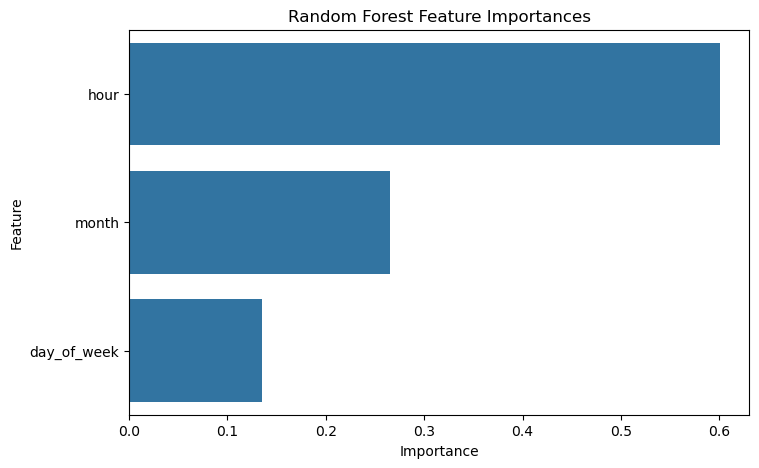

In [27]:

importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Random Forest Feature Importances')
plt.show()


## 11. Prediction Visualization

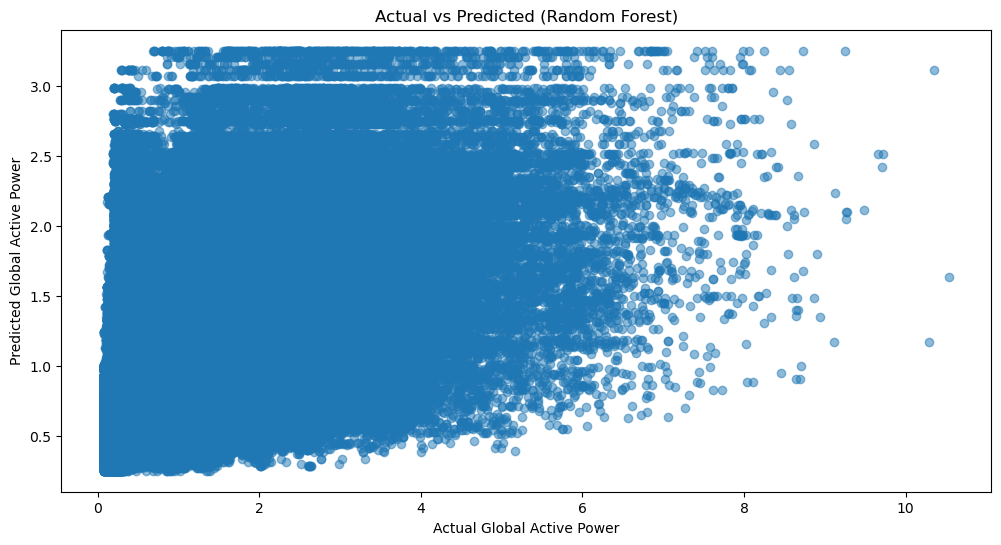

In [29]:

preds_rf = rf_model.predict(X_test)

plt.figure(figsize=(12,6))
plt.scatter(y_test, preds_rf, alpha=0.5)
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.title('Actual vs Predicted (Random Forest)')
plt.show()


## 12. Conclusion and Recommendations


Our Random Forest model achieved a lower RMSE and higher R² compared to Linear Regression, indicating better predictive performance.

**Key Insights:**
- Peak energy usage occurs in the evenings (6 PM to 10 PM).
- Hour of day is the most important feature for prediction.

**Recommendations:**
- Encourage shifting high-energy activities to off-peak hours.
- Future models can integrate weather data or appliance-level data for improved accuracy.
